<a href="https://colab.research.google.com/github/BYU-Hydroinformatics/gwdm_support_scripts/blob/main/File_Formatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **File Formatter**

### Used for formatting existing wells and time series files and assigning aquifers to these wells.

*The user picks options among a list of operations for cleaning the data and formatting data correctly for ingestion into the GWDM app.*  

## **Instructions:**
*This is a Google Colab Notebook, shared as a Github Gist. That means that you can perform operations within this notebook and download your files once you're done. Once you restart the session (e.g. refresh the page) your changes will not be saved. However, you can save a copy of this notebook using the "File" tab.*
* To use this tool, follow the instructions in the right side of each cell. 
* **To run each cell, press the play button on the left. Occasionally, the cell will require additional input after pressing the play button.**
* If an error appears, double check that all input options are correct.
* After all cells have been run, csv files will be generated, which can be downloaded from the "Files" window on the left

In [ ]:
#@markdown ### **<- Run this cell to install dependencies**
# Install dependencies
%%capture
!pip install dms2dec

In [ ]:
#@markdown ### **<- Run cell to load necessary packages**
%%capture
import pandas as pd
#import matplotlib.pyplot as plt
import ipywidgets as widgets
import sys
from google.colab import files
from dms2dec.dms_convert import dms2dec


## **Options:**

I. [Format wells file](#wells)
  - Convert Lat/Long coordinates from DMS to decimal
  - Coerce data types
  - Drop wells without measurements
  - Drop null values

II. [Format time series file](#TS)
  - Calculate Water Table Elevations (WTEs)
  - Coerce data types
  - Drop unnecessary columns
  - Drop null values

*If wells and time series measurements are included in the same file, fill out options as though they are separate and then indicate at the end. 

<a name="wells"></a>
###Wells File Options

In [ ]:

#@markdown ## **I. Options: Format Wells File**

#@markdown ##### 1. Add / format a wells file?
addWells = True #@param {type:"boolean"}
#@markdown ##### --> What format are the Lat/Long coordinates in?
latLong = "1) Decimal" #@param ["1) Decimal", "2) DMS"]
latLong = int(latLong[0])
#@markdown ##### --> What decimal type does the file use? (e.g. in U.S. decimal is a period ".")
decSymbol = "period (.)" #@param ["period (.)", "comma (,)"]
decSymbol_Wells = decSymbol[-2]
#@markdown ##### <br>2. Coerce data types for upload to GWDM app?
coerceTypesWells = True #@param {type:"boolean"}
#@markdown ##### <br>3. Drop wells without time series measurements of the selected variable? (requires time series file)
dropWells = False #@param {type:"boolean"}
#@markdown ##### <br>4. Drop null values and unnecessary columns? (In the GWDM app, any null values in the file will cause an error to occur)
dropWellNulls = True #@param {type:"boolean"}

#@markdown ### <br><br>**Now, run cell and follow instructions on output**

if addWells == True:
  print('\nUpload a file with well metadata')
  uploaded = files.upload()
  wells_file = ''.join(uploaded)
  wls_df = pd.read_csv(wells_file, decimal=decSymbol_Wells)
else:
  print("WELLS FILE NOT ADDED (if you need to add one, check the 'addTS' box and re-run the cell)\n")
  sys.exit("'addWells' option not selected")

wList = wls_df.columns
well_ID_Wells_widget = widgets.Dropdown(options=wList, description = "Well ID")
wellName_widget = widgets.Dropdown(options=wList, description = "Well Name")
long_widget = widgets.Dropdown(options=wList, description = "Longitude")
lat_widget = widgets.Dropdown(options=wList, description = "Latitude")
aqID_widget = widgets.Dropdown(options=wList.insert(0,"N/A"), description = "Aquifer ID")
gse_widget = widgets.Dropdown(options=wList.insert(0,"N/A"), description = "GSE")

wItems = [well_ID_Wells_widget, wellName_widget, long_widget, lat_widget, aqID_widget, gse_widget]
print("\nPlease select the appropriate headers for your file")
widgets.GridBox(wItems, layout=widgets.Layout(grid_template_columns="repeat(1, 550px)"))

<a name="TS"></a>
###Time Series File Options

In [ ]:
#@markdown ## **II. Options: Format Time Series File**

#@markdown ##### 1. Add / format a time series file?
addTS = False #@param {type:"boolean"}
#@markdown ##### --> What decimal type does the file use? (e.g. in U.S. decimal is a period ".")
decSymbol = "period (.)" #@param ["period (.)", "comma (,)"]
decSymbol_TS = decSymbol[-2]
#@markdown ##### <br>2. What is the variable of interest?
varName = "1) Depth to Groundwater" #@param ["1) Depth to Groundwater", "2) Water Table Elevation (WTE)", "3) Other"]
varName = int(varName[0])
#@markdown ##### <br>3. If variable is depth to GW, calculate (Water Table Elevation (WTE)? 
#@markdown (this requires the Ground Surface Elevation (GSE) of the well, either in the wells file or the TS file)
calcWTE = "2) Yes - GSE is in wells file" #@param ["1) No, don't calculate WTE", "2) Yes - GSE is in wells file", "3) Yes - GSE is in TS file"]
calcWTE = int(calcWTE[0])
#@markdown ##### <br>4. Coerce data types for upload to GWDM app?
coerceTypesTS = True #@param {type:"boolean"}
#@markdown ##### <br>5. Drop null values and unnecessary columns for upload to GWDM app?
dropTS = True #@param {type:"boolean"}

#@markdown ### <br><br>**Now, run cell and follow instructions on output**

if addTS == True: 
  print('Upload the time series file')
  uploaded = files.upload()
  tms_file = ''.join(uploaded)
  tms_df = pd.read_csv(tms_file, decimal=decSymbol_TS)
else:
  print("TIME SERIES FILE NOT ADDED (if you need to add one, check the 'addTS' box and re-run the cell)\n")
  sys.exit("'addTS' option not selected")

tList = tms_df.columns
well_ID_TS_widget = widgets.Dropdown(options=tList, description = "Well ID")
date_widget = widgets.Dropdown(options=tList, description = "Date")
var_widget = widgets.Dropdown(options=tList, description = "Variable")
aqIDTS_widget = widgets.Dropdown(options=tList.insert(0,"N/A"), description = "Aquifer ID")
tItems = [well_ID_TS_widget, date_widget, var_widget, aqIDTS_widget]
if calcWTE == 3: 
  gseTS_widget = widgets.Dropdown(options=tList, description = "GSE")
  tItems = [well_ID_TS_widget, date_widget, var_widget, aqIDTS_widget, gseTS_widget]

print("\nPlease select the appropriate headers for your file")
widgets.GridBox(tItems, layout=widgets.Layout(grid_template_columns="repeat(1, 350px)"))


### **Obtain values and define functions**

In [ ]:
#@markdown ### **<- Run cell to obtain values from dropdown menu(s)**

if 'wList' in globals():
  well_ID_Wells = well_ID_Wells_widget.value
  wellName = wellName_widget.value
  long = long_widget.value
  lat = lat_widget.value
  aqID = aqID_widget.value
  gse = gse_widget.value
if 'tList' in globals():
  well_ID_TS = well_ID_TS_widget.value
  date = date_widget.value
  var = var_widget.value
  aqIDTS = aqIDTS_widget.value
  if 'calcWTE' == 3: gseTS = gseTS_widget.value
  else: gseTS = "N/A"
print("Success!")

In [ ]:
#@markdown ### **<- Run cell to create functions**

# Function to coerce data types
def coerceTypes(df, latLongType=1, lonCol=1, latCol=1, variableCol=1, gseCol="N/A", aqIdCol="N/A"):
  new_df = df
  if latLongType == 2: new_df[["LongDecimal", "LatDecimal"]] = new_df[[lonCol, latCol]].applymap(lambda x: dms2dec(x))
  if gseCol != "N/A": new_df[gseCol] = new_df[gseCol].astype(float)
  if variableCol != 1: new_df[variableCol] = new_df[variableCol].astype(float)
  if aqIdCol != "N/A":
    if new_df.dtypes[aqIdCol] == 'float':
      new_df[aqIdCol] = new_df[aqIdCol].astype('int')
      new_df[aqIdCol] = new_df[aqIdCol].astype('str')
  return new_df

# Function to drop wells that do not have measurements
def dropWls(wells_df, TS_df, Wells_well_ID, TS_well_ID, dateCol, variableCol):
  wellCols = wells_df.columns
  new_df = wells_df.merge(TS_df[[TS_well_ID, dateCol, variableCol]], how="left", left_on=Wells_well_ID, right_on=TS_well_ID)
  new_df = new_df.dropna(axis=0, subset=[variableCol])
  new_df = new_df.drop_duplicates(subset=[Wells_well_ID])
  new_df = new_df.drop([dateCol, variableCol],axis=1)
  return new_df

# Function to determine the rows in one dataframe that are not found in the other
def diff(df1, df2):
  new_df = df1.merge(df2,indicator = True, how='outer').loc[lambda x : x['_merge']=='left_only']
  return new_df

print("Success!")

## **Format Wells File**

In [ ]:
#@markdown ### **<- Run cell to format your wells file**

if 'wls_df' in globals() and addWells == True:
  var = var_widget.value
  wls_modified_df = wls_df.copy()
  if dropWells == True:
    # Drop wells that do not have measurements
    wls_modified_df = dropWls(wls_modified_df, tms_df, well_ID_Wells, well_ID_TS, date, var)
    dropped_wells_df = diff(wls_df, wls_modified_df)
    print("There were %d wells dropped that didn't have any time series measurements for the given variable." %len(dropped_wells_df))
  if dropWellNulls == True:
    # Drop unnecessary columns and wells that have null values
    colList = [well_ID_Wells, wellName, long, lat]
    if aqID != "N/A": colList.append(aqID)
    if gse != "N/A": colList.append(gse)
    wls_modified_df = wls_modified_df[colList]
    copy_df = wls_modified_df.copy()
    wls_modified_df.dropna(how='any',axis=0, inplace=True)
    wls_modified_df.drop_duplicates(well_ID_Wells, inplace=True)
    dropped_wells_df = diff(copy_df, wls_modified_df)
    print("\nThere were %d wells dropped that had null values." %len(dropped_wells_df))
  if coerceTypesWells == True:
    # Coerce data types (e.g. gse as a float, lat/long coordinates as decimals, etc.)
    wls_modified_df = coerceTypes(wls_modified_df, latLongType=latLong, lonCol=long, latCol=lat, gseCol=gse)
    print("\nDate types were coerced.")
  
  wls_modified_df.drop_duplicates(well_ID_Wells, inplace=True)
  print("\nThere were %d duplicate Well IDs that were dropped." %(len(copy_df) - len(dropped_wells_df) - len(wls_modified_df)))
  # Create Wells csv
  wls_modified_df.to_csv(wells_file[0:-4]+'_formatted.csv', index=None)
else:
  print('Wells file does not exist. Return to Options section to add one.')

#@markdown ##### File can be downloaded from 'Files' pane on the left

## **Format Time Series File**

In [ ]:
#@markdown ### **<- Run cell to format your time series file**

if 'tms_df' in globals() and addTS == True:
  var = var_widget.value
  tms_modified_df = tms_df
  if coerceTypesTS == True:
    # Coerce data types
    tms_modified_df = coerceTypes(tms_modified_df, variableCol=var, gseCol=gseTS, aqIdCol=aqIDTS)
    print("Date types were coerced.")
  if varName == 1:
    if calcWTE == 2:
      # Retrieve GSE from wells file and calculate WTE
      try:
        tms_modified_df = tms_modified_df.merge(wls_df[[well_ID_Wells, gse]], how="left", left_on=well_ID_TS, right_on=well_ID_Wells)
        tms_modified_df["WTE"] = tms_modified_df[gse] - tms_modified_df[var].abs()
        var = "WTE"
        print("\nWTE was calculated for the file.\n")
      except KeyError:
        print("\nERROR: You might not have a GSE column defined in your wells file")
    elif calcWTE == 3:
      # Using GSE from TS file, calculate WTE
      try:
        tms_modified_df["WTE"] = tms_modified_df[gseTS] - tms_modified_df[var].abs()
        var = "WTE"
        print("\nWTE was calculated for the file.\n")
      except KeyError:
        print("\nERROR: You might not have a GSE column defined in your time series file")
  if dropTS == True:
    # Remove unnecessary columns
    if aqIDTS != "N/A": tms_modified_df = tms_modified_df[[well_ID_TS, date, var, aqIDTS]]
    else: tms_modified_df = tms_modified_df[[well_ID_TS, date, var]]
    # Drop rows with missing values and count those rows
    copy_df2 = tms_modified_df
    tms_modified_df = tms_modified_df.dropna(how='any',axis=0)
    dropped_wells_df2 = diff(tms_modified_df, copy_df2)
    print("There were %d rows dropped that had null values." %len(dropped_wells_df2))
  # Creat TS csv
  tms_modified_df.to_csv(tms_file[0:-4]+'_formatted.csv', index=None)
else:
  print('Time Series file does not exist. Return to Options section to add one.')

#@markdown ##### File can be downloaded from 'Files' pane on the left

## **Retrieve Files**
#### Check the 'Files' panel on the left for your new files (hit the refresh button if they don't appear immediately)
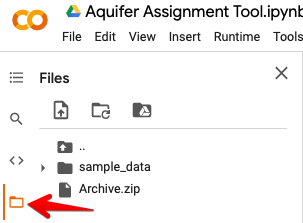